## **Разведочный анализ данных. Исследование и визуализация данных** Яровенко Максим, ИУ5Ц-82Б



### 1) Текстовое описание набора данных

В качестве набора данных воспользуемся предложенным рекомендательным набором в sklearn для выполнения данной лабораторной работы. Вот ссылка: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine . Набор данных не содержит в начале файла заголовков, поэтому необходимо добавить их самостоятельно.

Файл состоит из следующих колонок:
- Class - целевой признак. Рассматриваются три вида вина. Значения - 1,2,3
- Alcohol - Процент спирта
- Malic acid - Яблочная кислота
- Ash - Зола
- Alcanity of ash - Щелочность золы
- Magnesium - Магний
- Total phenols - Кол-во фенолов
- Flavanoids - Флавоноиды
- Nonflavanoid phenols - Нефлаваноидные фенолы
- Proanthocyanins - Проантоцианидины
- Color intensity - Интенсивность цвета
- Hue - Оттенок
- OD280/OD315 of diluted wines - OD280 / OD315 разбавленных вин Спектральное измерение белка / концентрации разбавленных вин
- Proline - Пролин

### Импорт библиотек

Импортируем библиотеки необходимые для визуального анализа данных.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Загрузка данных

Прочтём данные из скаченного файла с помощью библиотеки Pandas.

In [6]:
data = pd.read_csv('wine.data', sep=",")

## 2) Основные характеристики датасета

In [7]:
data.head()

Class  Alcohol  Malic acid   Ash  Alcanity of ash  Magnesium  \
0      1    14.23        1.71  2.43             15.6        127   
1      1    13.20        1.78  2.14             11.2        100   
2      1    13.16        2.36  2.67             18.6        101   
3      1    14.37        1.95  2.50             16.8        113   
4      1    13.24        2.59  2.87             21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

In [8]:
data.shape

(178, 14)

In [9]:
data.columns

Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcanity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [6]:
data.dtypes

Class                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcanity of ash                 float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [7]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Class - 0
Alcohol - 0
Malic acid - 0
Ash - 0
Alcanity of ash - 0
Magnesium - 0
Total phenols - 0
Flavanoids - 0
Nonflavanoid phenols - 0
Proanthocyanins - 0
Color intensity - 0
Hue - 0
OD280/OD315 of diluted wines - 0
Proline - 0


In [8]:
data.describe()

Class     Alcohol  Malic acid         Ash  Alcanity of ash  \
count  178.000000  178.000000  178.000000  178.000000       178.000000   
mean     1.938202   13.000618    2.336348    2.366517        19.494944   
std      0.775035    0.811827    1.117146    0.274344         3.339564   
min      1.000000   11.030000    0.740000    1.360000        10.600000   
25%      1.000000   12.362500    1.602500    2.210000        17.200000   
50%      2.000000   13.050000    1.865000    2.360000        19.500000   
75%      3.000000   13.677500    3.082500    2.557500        21.500000   
max      3.000000   14.830000    5.800000    3.230000        30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000    0.340000              0.130000   
25%     88.000000       1.742500    1.205000              0.270000   
50%     98.000000       2.355000    2.135000              0.340000   
75%    107.000000       2.800000    2.875000              0.437500   
max    162.000000       3.880000    5.080000              0.660000   

       Proanthocyanins  Color intensity         Hue  \
count       178.000000       178.000000  178.000000   
mean          1.590899         5.058090    0.957449   
std           0.572359         2.318286    0.228572   
min           0.410000         1.280000    0.480000   
25%           1.250000         3.220000    0.782500   
50%           1.555000         4.690000    0.965000   
75%           1.950000         6.200000    1.120000   
max           3.580000        13.000000    1.710000   

       OD280/OD315 of diluted wines      Proline  
count                    178.000000   178.000000  
mean                       2.611685   746.893258  
std                        0.709990   314.907474  
min                        1.270000   278.000000  
25%                        1.937500   500.500000  
50%                        2.780000   673.500000  
75%                        3.170000   985.000000  
max                        4.000000  1680.000000

In [9]:
data['Class'].unique()

array([1, 2, 3])

## 3) Визуальное исследование датасета

Построим диаграммы, которые наиболее часто используются при визуальном анализе данных.

#### Диаграмма рассеяния.

Помогает обнаружить визуально наличие зависимости. P.S. (График ниже не похож на зависимость)

<AxesSubplot:xlabel='Ash', ylabel='Alcanity of ash'>

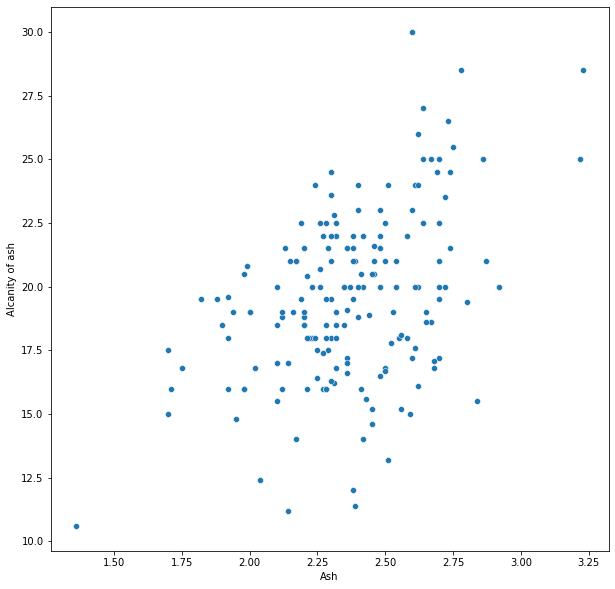

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='Ash', y='Alcanity of ash', data=data)

<AxesSubplot:xlabel='Ash', ylabel='Alcanity of ash'>

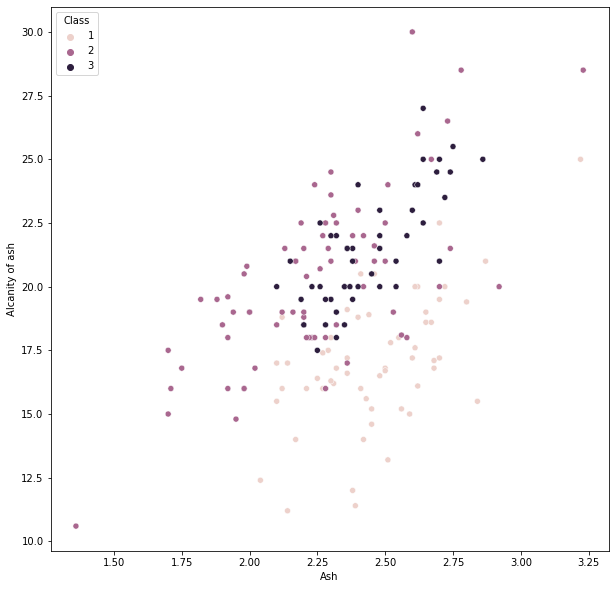

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='Ash', y='Alcanity of ash', data=data, hue='Class')

### Гистограмма

/home/artyom/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hue', ylabel='Density'>

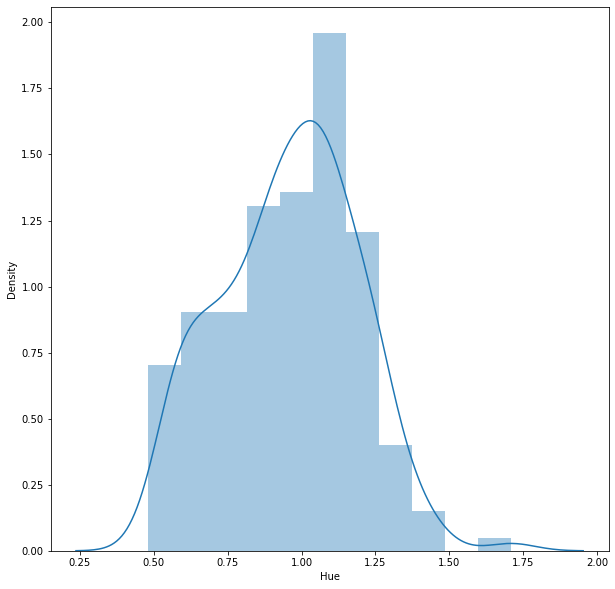

In [12]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Hue'])

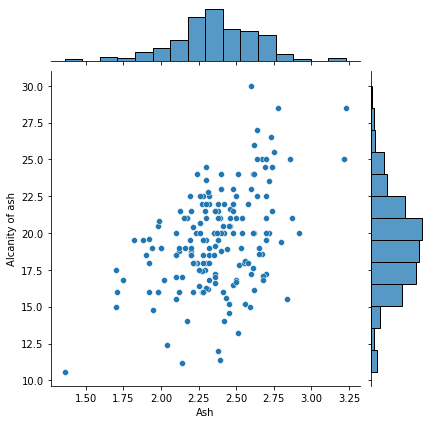

In [13]:
sns.jointplot(x='Ash', y='Alcanity of ash', data=data)

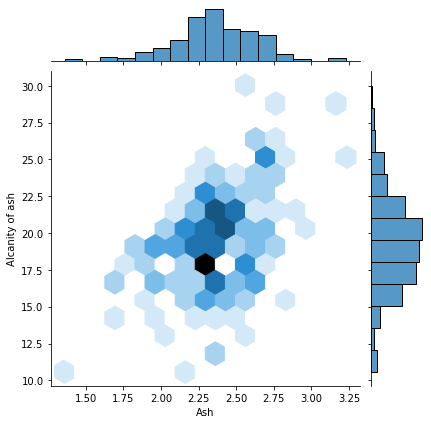

In [14]:
sns.jointplot(x='Ash', y='Alcanity of ash', data=data,kind="hex")

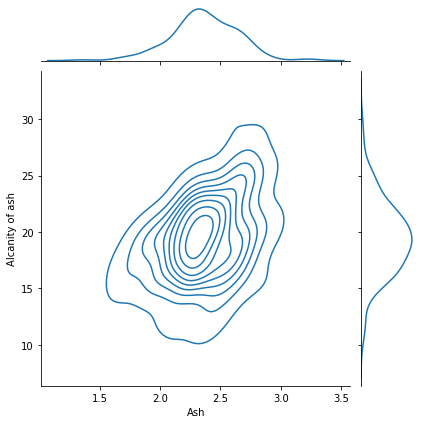

In [15]:
sns.jointplot(x='Ash', y='Alcanity of ash', data=data,kind="kde")

### Парные диаграммы

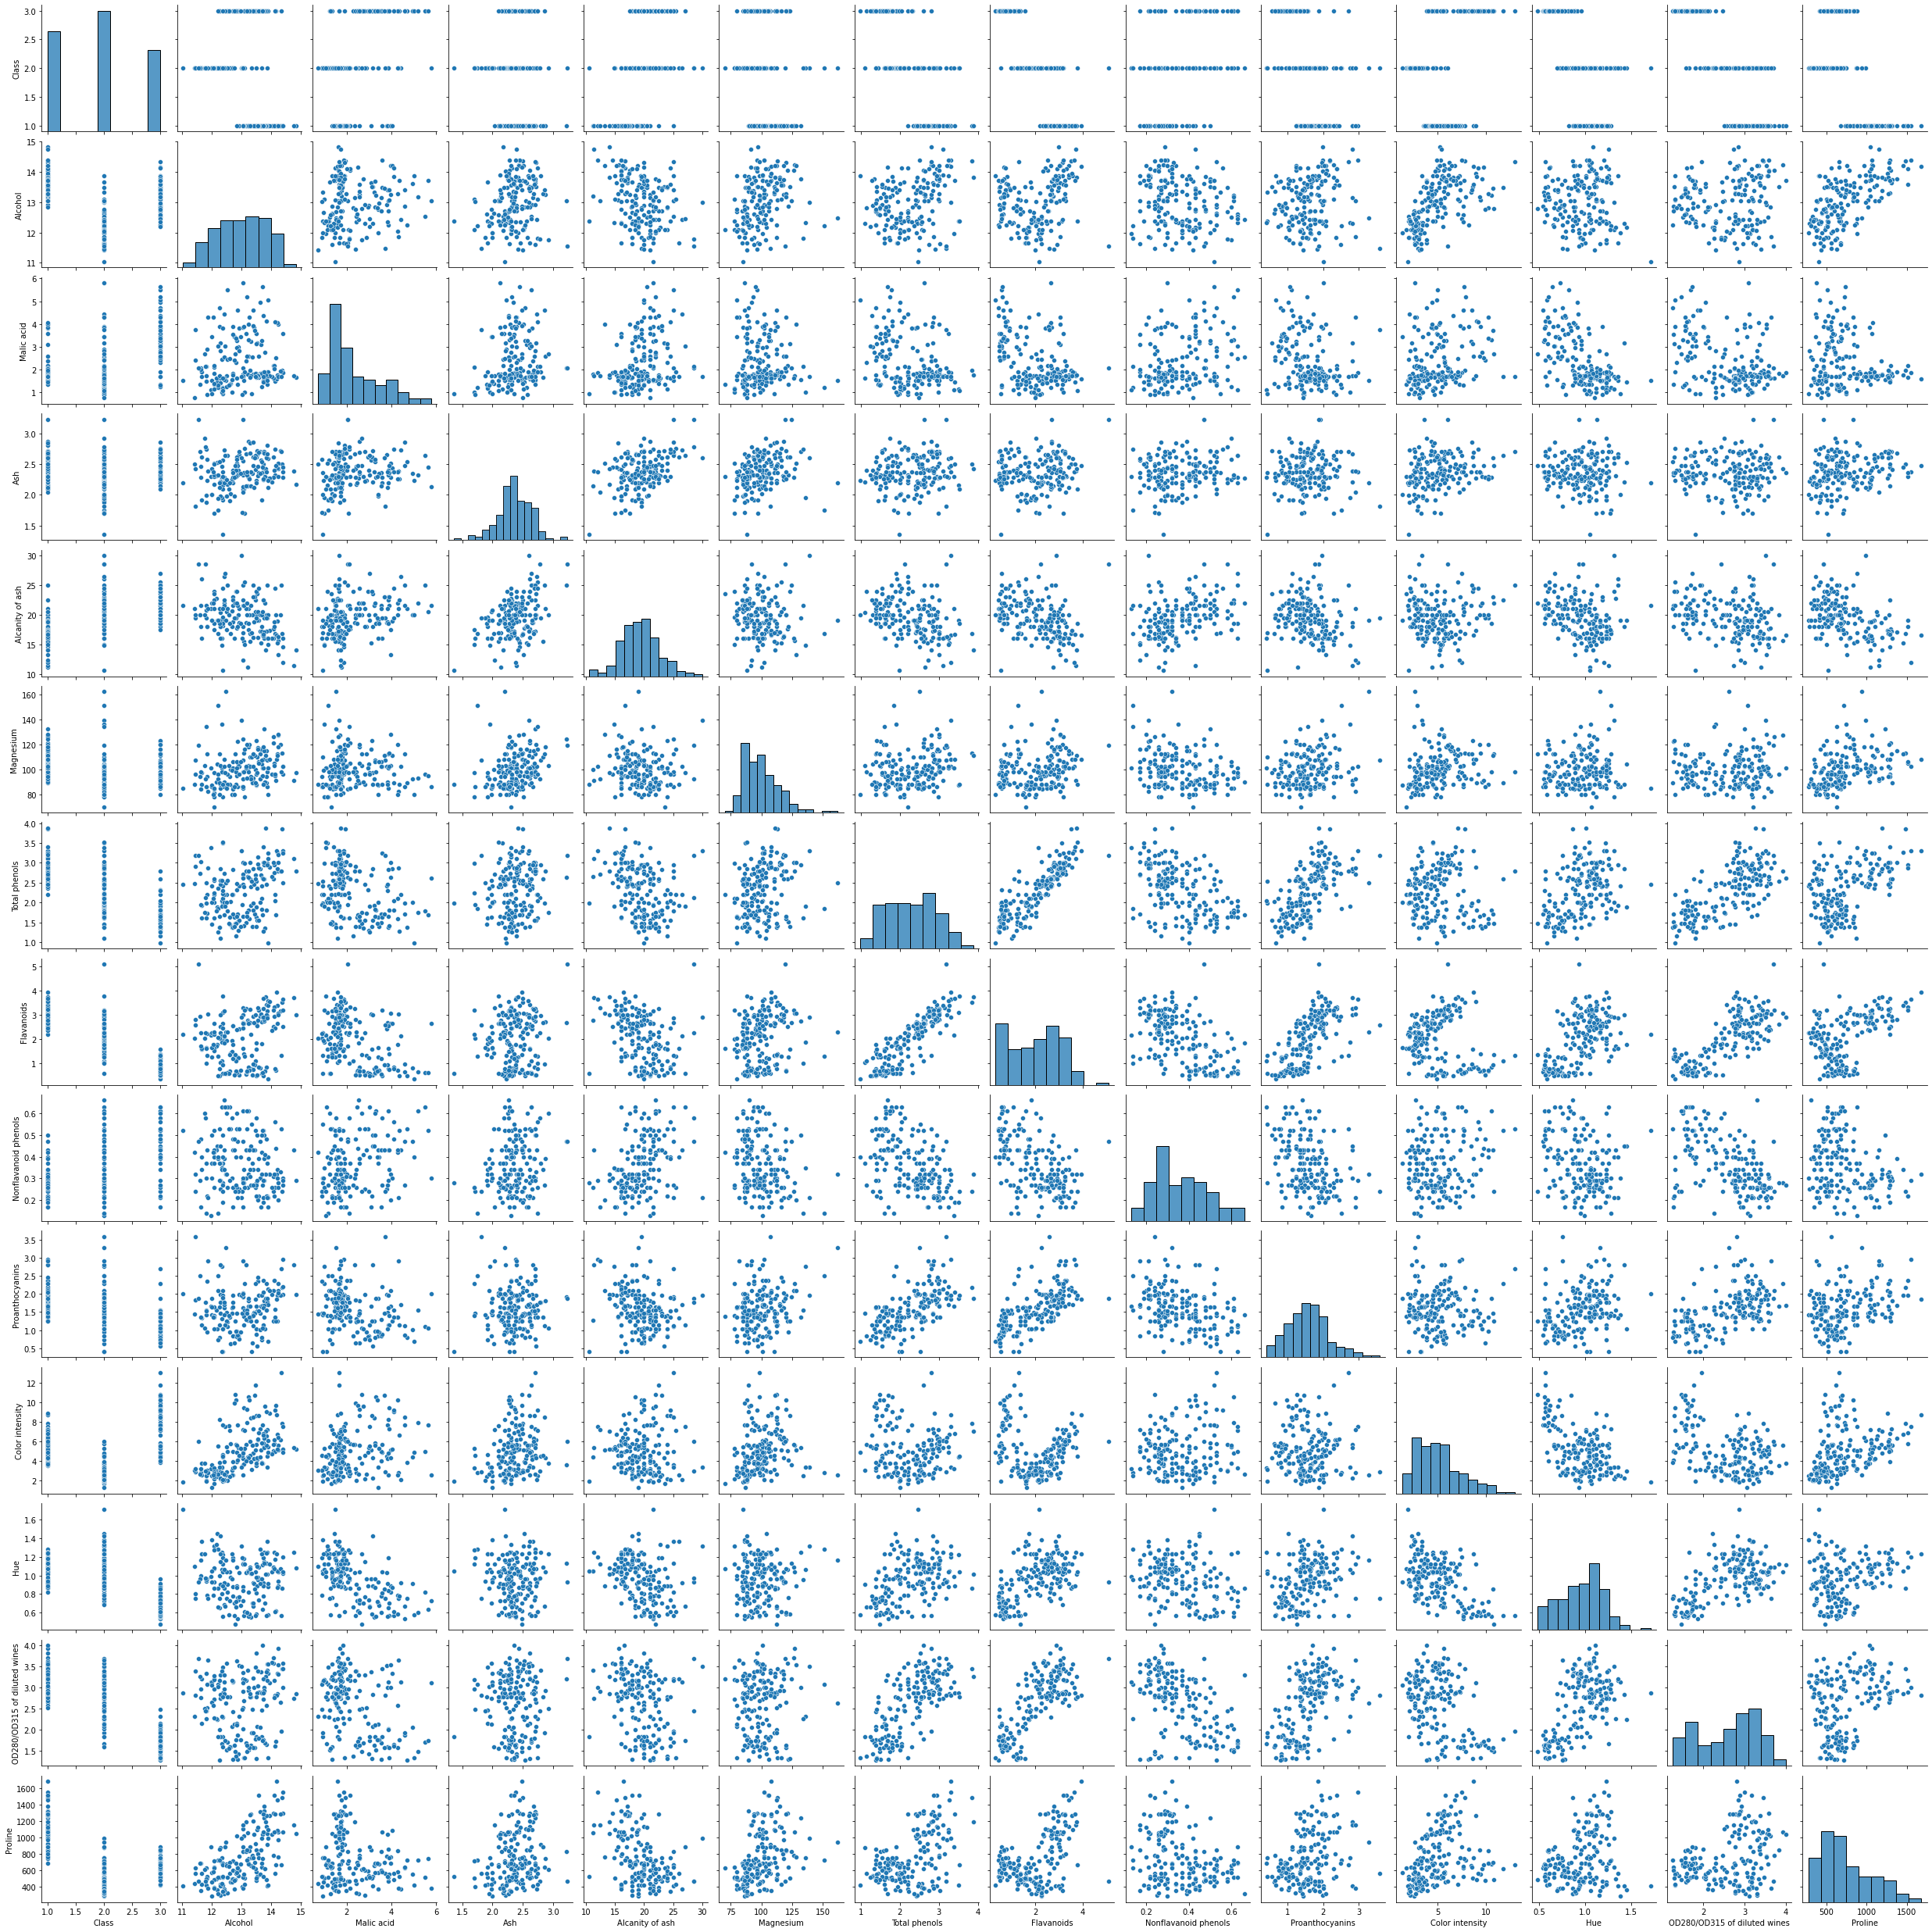

In [16]:
sns.pairplot(data)

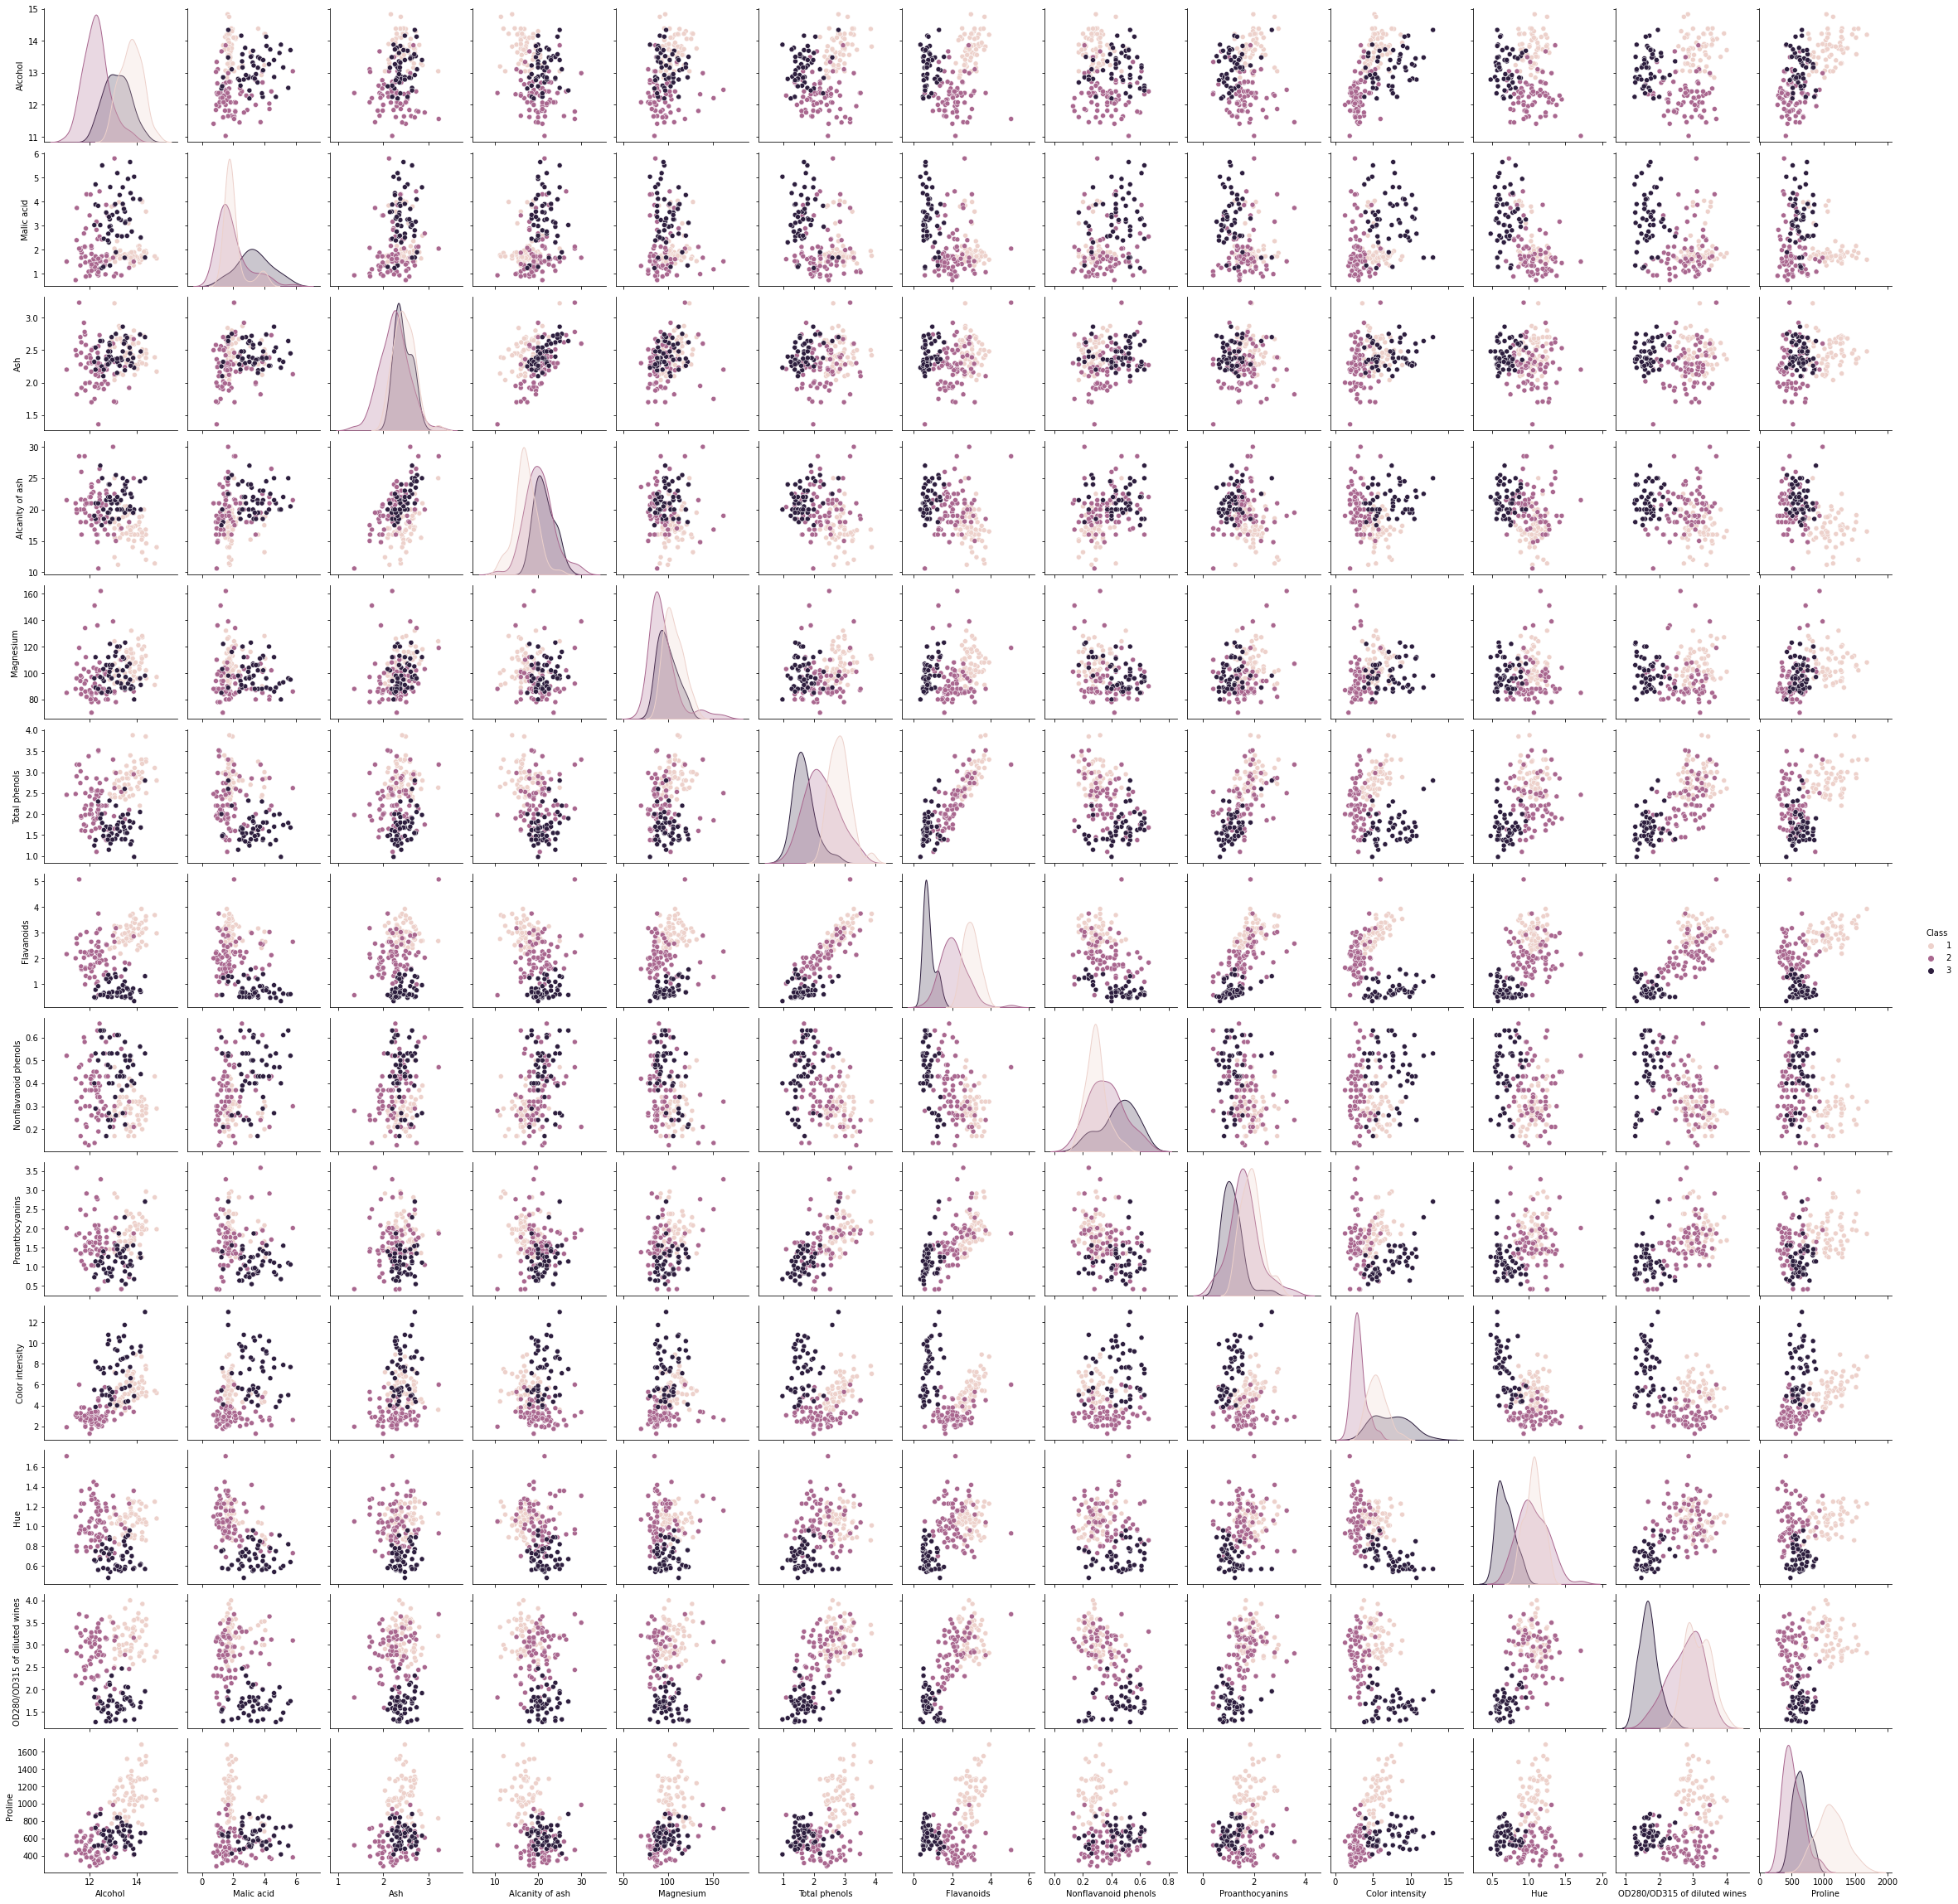

In [17]:
sns.pairplot(data, hue="Class")

### Ящик с усами

<AxesSubplot:xlabel='Total phenols'>

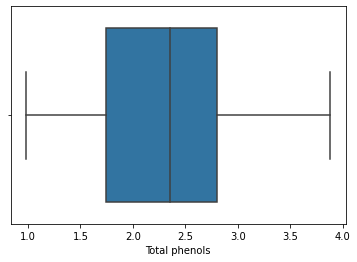

In [18]:
sns.boxplot(x=data['Total phenols'])

<AxesSubplot:ylabel='Total phenols'>

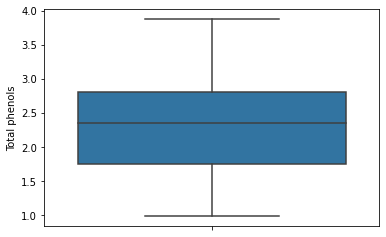

In [19]:
sns.boxplot(y=data['Total phenols'])

<AxesSubplot:xlabel='Class', ylabel='Total phenols'>

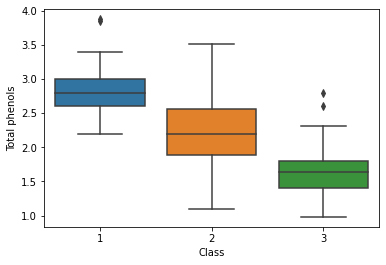

In [20]:
sns.boxplot(x='Class', y='Total phenols', data=data)

<AxesSubplot:xlabel='Total phenols'>

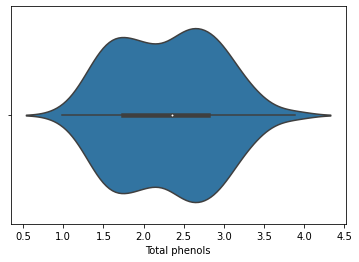

In [21]:
sns.violinplot(x=data['Total phenols'])

/home/artyom/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total phenols', ylabel='Density'>

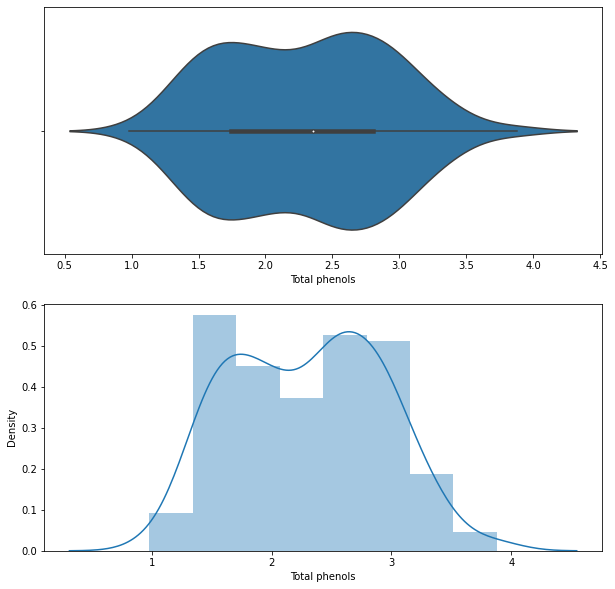

In [22]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['Total phenols'])
sns.distplot(data['Total phenols'], ax=ax[1])

<AxesSubplot:xlabel='Class', ylabel='Total phenols'>

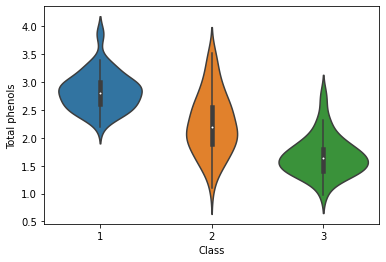

In [23]:
sns.violinplot(x='Class', y='Total phenols', data=data)

<AxesSubplot:xlabel='Class', ylabel='Total phenols'>

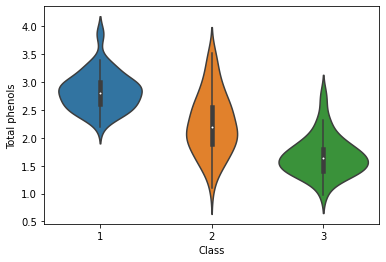

In [24]:
sns.violinplot(x='Class', y='Total phenols', data=data,kind="violin",split=True)

## 4) Информация о корреляции признаков

Проверка корреляции признаков позволяет решить две задачи:

1. Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "Class"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.
2. Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.



In [25]:
data.corr()

Class   Alcohol  Malic acid       Ash  \
Class                         1.000000 -0.328222    0.437776 -0.049643   
Alcohol                      -0.328222  1.000000    0.094397  0.211545   
Malic acid                    0.437776  0.094397    1.000000  0.164045   
Ash                          -0.049643  0.211545    0.164045  1.000000   
Alcanity of ash               0.517859 -0.310235    0.288500  0.443367   
Magnesium                    -0.209179  0.270798   -0.054575  0.286587   
Total phenols                -0.719163  0.289101   -0.335167  0.128980   
Flavanoids                   -0.847498  0.236815   -0.411007  0.115077   
Nonflavanoid phenols          0.489109 -0.155929    0.292977  0.186230   
Proanthocyanins              -0.499130  0.136698   -0.220746  0.009652   
Color intensity               0.265668  0.546364    0.248985  0.258887   
Hue                          -0.617369 -0.071747   -0.561296 -0.074667   
OD280/OD315 of diluted wines -0.788230  0.072343   -0.368710  0.003911   
Proline                      -0.633717  0.643720   -0.192011  0.223626   

                              Alcanity of ash  Magnesium  Total phenols  \
Class                                0.517859  -0.209179      -0.719163   
Alcohol                             -0.310235   0.270798       0.289101   
Malic acid                           0.288500  -0.054575      -0.335167   
Ash                                  0.443367   0.286587       0.128980   
Alcanity of ash                      1.000000  -0.083333      -0.321113   
Magnesium                           -0.083333   1.000000       0.214401   
Total phenols                       -0.321113   0.214401       1.000000   
Flavanoids                          -0.351370   0.195784       0.864564   
Nonflavanoid phenols                 0.361922  -0.256294      -0.449935   
Proanthocyanins                     -0.197327   0.236441       0.612413   
Color intensity                      0.018732   0.199950      -0.055136   
Hue                                 -0.273955   0.055398       0.433681   
OD280/OD315 of diluted wines        -0.276769   0.066004       0.699949   
Proline                             -0.440597   0.393351       0.498115   

                              Flavanoids  Nonflavanoid phenols  \
Class                          -0.847498              0.489109   
Alcohol                         0.236815             -0.155929   
Malic acid                     -0.411007              0.292977   
Ash                             0.115077              0.186230   
Alcanity of ash                -0.351370              0.361922   
Magnesium                       0.195784             -0.256294   
Total phenols                   0.864564             -0.449935   
Flavanoids                      1.000000             -0.537900   
Nonflavanoid phenols           -0.537900              1.000000   
Proanthocyanins                 0.652692             -0.365845   
Color intensity                -0.172379              0.139057   
Hue                             0.543479             -0.262640   
OD280/OD315 of diluted wines    0.787194             -0.503270   
Proline                         0.494193             -0.311385   

                              Proanthocyanins  Color intensity       Hue  \
Class                               -0.499130         0.265668 -0.617369   
Alcohol                              0.136698         0.546364 -0.071747   
Malic acid                          -0.220746         0.248985 -0.561296   
Ash                                  0.009652         0.258887 -0.074667   
Alcanity of ash                     -0.197327         0.018732 -0.273955   
Magnesium                            0.236441         0.199950  0.055398   
Total phenols                        0.612413        -0.055136  0.433681   
Flavanoids                           0.652692        -0.172379  0.543479   
Nonflavanoid phenols                -0.365845         0.139057 -0.262640   
Proanthocyanins                      1.000000

На основе корреляционной матрицы можно сделать следующие выводы:
- Целевой признак наиболее коррелирует с количеством фенолов и флаваноидов. Также со спектральным измерением белка.
- Целевой признак отчасти коррелирует с количеством яблочной кислоты, с щёлочностью золы, нефлавоноидными фенолами, Проантоцианидинами, оттенком, пролином.
- Целевой признак слабо коррелирует с процентом спирта, магнием, интенсивностью цвета.
- По прошлым диаграммам можно сделать вывод, что количество фенолов линейно зависимо с количеством флавоноидов. Среди обоих признаков можно оставить наиболее коррелирующий.

In [26]:
data.corr(method='pearson')

Class   Alcohol  Malic acid       Ash  \
Class                         1.000000 -0.328222    0.437776 -0.049643   
Alcohol                      -0.328222  1.000000    0.094397  0.211545   
Malic acid                    0.437776  0.094397    1.000000  0.164045   
Ash                          -0.049643  0.211545    0.164045  1.000000   
Alcanity of ash               0.517859 -0.310235    0.288500  0.443367   
Magnesium                    -0.209179  0.270798   -0.054575  0.286587   
Total phenols                -0.719163  0.289101   -0.335167  0.128980   
Flavanoids                   -0.847498  0.236815   -0.411007  0.115077   
Nonflavanoid phenols          0.489109 -0.155929    0.292977  0.186230   
Proanthocyanins              -0.499130  0.136698   -0.220746  0.009652   
Color intensity               0.265668  0.546364    0.248985  0.258887   
Hue                          -0.617369 -0.071747   -0.561296 -0.074667   
OD280/OD315 of diluted wines -0.788230  0.072343   -0.368710  0.003911   
Proline                      -0.633717  0.643720   -0.192011  0.223626   

                              Alcanity of ash  Magnesium  Total phenols  \
Class                                0.517859  -0.209179      -0.719163   
Alcohol                             -0.310235   0.270798       0.289101   
Malic acid                           0.288500  -0.054575      -0.335167   
Ash                                  0.443367   0.286587       0.128980   
Alcanity of ash                      1.000000  -0.083333      -0.321113   
Magnesium                           -0.083333   1.000000       0.214401   
Total phenols                       -0.321113   0.214401       1.000000   
Flavanoids                          -0.351370   0.195784       0.864564   
Nonflavanoid phenols                 0.361922  -0.256294      -0.449935   
Proanthocyanins                     -0.197327   0.236441       0.612413   
Color intensity                      0.018732   0.199950      -0.055136   
Hue                                 -0.273955   0.055398       0.433681   
OD280/OD315 of diluted wines        -0.276769   0.066004       0.699949   
Proline                             -0.440597   0.393351       0.498115   

                              Flavanoids  Nonflavanoid phenols  \
Class                          -0.847498              0.489109   
Alcohol                         0.236815             -0.155929   
Malic acid                     -0.411007              0.292977   
Ash                             0.115077              0.186230   
Alcanity of ash                -0.351370              0.361922   
Magnesium                       0.195784             -0.256294   
Total phenols                   0.864564             -0.449935   
Flavanoids                      1.000000             -0.537900   
Nonflavanoid phenols           -0.537900              1.000000   
Proanthocyanins                 0.652692             -0.365845   
Color intensity                -0.172379              0.139057   
Hue                             0.543479             -0.262640   
OD280/OD315 of diluted wines    0.787194             -0.503270   
Proline                         0.494193             -0.311385   

                              Proanthocyanins  Color intensity       Hue  \
Class                               -0.499130         0.265668 -0.617369   
Alcohol                              0.136698         0.546364 -0.071747   
Malic acid                          -0.220746         0.248985 -0.561296   
Ash                                  0.009652         0.258887 -0.074667   
Alcanity of ash                     -0.197327         0.018732 -0.273955   
Magnesium                            0.236441         0.199950  0.055398   
Total phenols                        0.612413        -0.055136  0.433681   
Flavanoids                           0.652692        -0.172379  0.543479   
Nonflavanoid phenols                -0.365845         0.139057 -0.262640   
Proanthocyanins                      1.000000

In [27]:
data.corr(method='kendall')

Class   Alcohol  Malic acid       Ash  \
Class                         1.000000 -0.238984    0.247494 -0.038085   
Alcohol                      -0.238984  1.000000    0.093844  0.170154   
Malic acid                    0.247494  0.093844    1.000000  0.158178   
Ash                          -0.038085  0.170154    0.158178  1.000000   
Alcanity of ash               0.449402 -0.212978    0.210119  0.258352   
Magnesium                    -0.184992  0.250506    0.050869  0.254246   
Total phenols                -0.590404  0.209099   -0.174929  0.089855   
Flavanoids                   -0.725255  0.191087   -0.211918  0.049474   
Nonflavanoid phenols          0.379234 -0.109554    0.175129  0.098937   
Proanthocyanins              -0.450225  0.133526   -0.168714  0.018240   
Color intensity               0.065124  0.434353    0.195607  0.187786   
Hue                          -0.479229 -0.021717   -0.388707 -0.037234   
OD280/OD315 of diluted wines -0.607572  0.061513   -0.162909 -0.006341   
Proline                      -0.406260  0.449387   -0.044660  0.171574   

                              Alcanity of ash  Magnesium  Total phenols  \
Class                                0.449402  -0.184992      -0.590404   
Alcohol                             -0.212978   0.250506       0.209099   
Malic acid                           0.210119   0.050869      -0.174929   
Ash                                  0.258352   0.254246       0.089855   
Alcanity of ash                      1.000000  -0.121005      -0.256669   
Magnesium                           -0.121005   1.000000       0.172195   
Total phenols                       -0.256669   0.172195       1.000000   
Flavanoids                          -0.309865   0.161603       0.701999   
Nonflavanoid phenols                 0.278091  -0.158361      -0.310443   
Proanthocyanins                     -0.171404   0.117871       0.466517   
Color intensity                     -0.057281   0.241781       0.028264   
Hue                                 -0.239210   0.023760       0.289210   
OD280/OD315 of diluted wines        -0.226253   0.034307       0.478267   
Proline                             -0.313218   0.343016       0.280203   

                              Flavanoids  Nonflavanoid phenols  \
Class                          -0.725255              0.379234   
Alcohol                         0.191087             -0.109554   
Malic acid                     -0.211918              0.175129   
Ash                             0.049474              0.098937   
Alcanity of ash                -0.309865              0.278091   
Magnesium                       0.161603             -0.158361   
Total phenols                   0.701999             -0.310443   
Flavanoids                      1.000000             -0.378099   
Nonflavanoid phenols           -0.378099              1.000000   
Proanthocyanins                 0.534615             -0.269189   
Color intensity                 0.028674              0.036065   
Hue                             0.354372             -0.179755   
OD280/OD315 of diluted wines    0.520448             -0.363787   
Proline                         0.263661             -0.174108   

                              Proanthocyanins  Color intensity       Hue  \
Class                               -0.450225         0.065124 -0.479229   
Alcohol                              0.133526         0.434353 -0.021717   
Malic acid                          -0.168714         0.195607 -0.388707   
Ash                                  0.018240         0.187786 -0.037234   
Alcanity of ash                     -0.171404        -0.057281 -0.239210   
Magnesium                            0.117871         0.241781  0.023760   
Total phenols                        0.466517         0.028264  0.289210   
Flavanoids                           0.534615         0.028674  0.354372   
Nonflavanoid phenols                -0.269189         0.036065 -0.179755   
Proanthocyanins                      1.000000

In [28]:
data.corr(method='spearman')

Class   Alcohol  Malic acid       Ash  \
Class                         1.000000 -0.354167    0.346913 -0.053988   
Alcohol                      -0.354167  1.000000    0.140430  0.243722   
Malic acid                    0.346913  0.140430    1.000000  0.230674   
Ash                          -0.053988  0.243722    0.230674  1.000000   
Alcanity of ash               0.569792 -0.306598    0.304069  0.366374   
Magnesium                    -0.250498  0.365503    0.080188  0.361488   
Total phenols                -0.726544  0.310920   -0.280225  0.132193   
Flavanoids                   -0.854908  0.294740   -0.325202  0.078796   
Nonflavanoid phenols          0.474205 -0.162207    0.255236  0.145583   
Proanthocyanins              -0.570648  0.192734   -0.244825  0.024384   
Color intensity               0.131170  0.635425    0.290307  0.283047   
Hue                          -0.616570 -0.024203   -0.560265 -0.050183   
OD280/OD315 of diluted wines -0.743787  0.103050   -0.255185 -0.007500   
Proline                      -0.576383  0.633580   -0.057466  0.253163   

                              Alcanity of ash  Magnesium  Total phenols  \
Class                                0.569792  -0.250498      -0.726544   
Alcohol                             -0.306598   0.365503       0.310920   
Malic acid                           0.304069   0.080188      -0.280225   
Ash                                  0.366374   0.361488       0.132193   
Alcanity of ash                      1.000000  -0.169558      -0.376657   
Magnesium                           -0.169558   1.000000       0.246417   
Total phenols                       -0.376657   0.246417       1.000000   
Flavanoids                          -0.443770   0.233167       0.879404   
Nonflavanoid phenols                 0.389390  -0.236786      -0.448013   
Proanthocyanins                     -0.253695   0.173647       0.666689   
Color intensity                     -0.073776   0.357029       0.011162   
Hue                                 -0.352507   0.036095       0.439457   
OD280/OD315 of diluted wines        -0.325890   0.056963       0.687207   
Proline                             -0.456090   0.507575       0.419470   

                              Flavanoids  Nonflavanoid phenols  \
Class                          -0.854908              0.474205   
Alcohol                         0.294740             -0.162207   
Malic acid                     -0.325202              0.255236   
Ash                             0.078796              0.145583   
Alcanity of ash                -0.443770              0.389390   
Magnesium                       0.233167             -0.236786   
Total phenols                   0.879404             -0.448013   
Flavanoids                      1.000000             -0.543897   
Nonflavanoid phenols           -0.543897              1.000000   
Proanthocyanins                 0.730322             -0.384629   
Color intensity                -0.042910              0.059639   
Hue                             0.535430             -0.267813   
OD280/OD315 of diluted wines    0.741533             -0.494950   
Proline                         0.429904             -0.270112   

                              Proanthocyanins  Color intensity       Hue  \
Class                               -0.570648         0.131170 -0.616570   
Alcohol                              0.192734         0.635425 -0.024203   
Malic acid                          -0.244825         0.290307 -0.560265   
Ash                                  0.024384         0.283047 -0.050183   
Alcanity of ash                     -0.253695        -0.073776 -0.352507   
Magnesium                            0.173647         0.357029  0.036095   
Total phenols                        0.666689         0.011162  0.439457   
Flavanoids                           0.730322        -0.042910  0.535430   
Nonflavanoid phenols                -0.384629         0.059639 -0.267813   
Proanthocyanins                      1.000000

<AxesSubplot:>

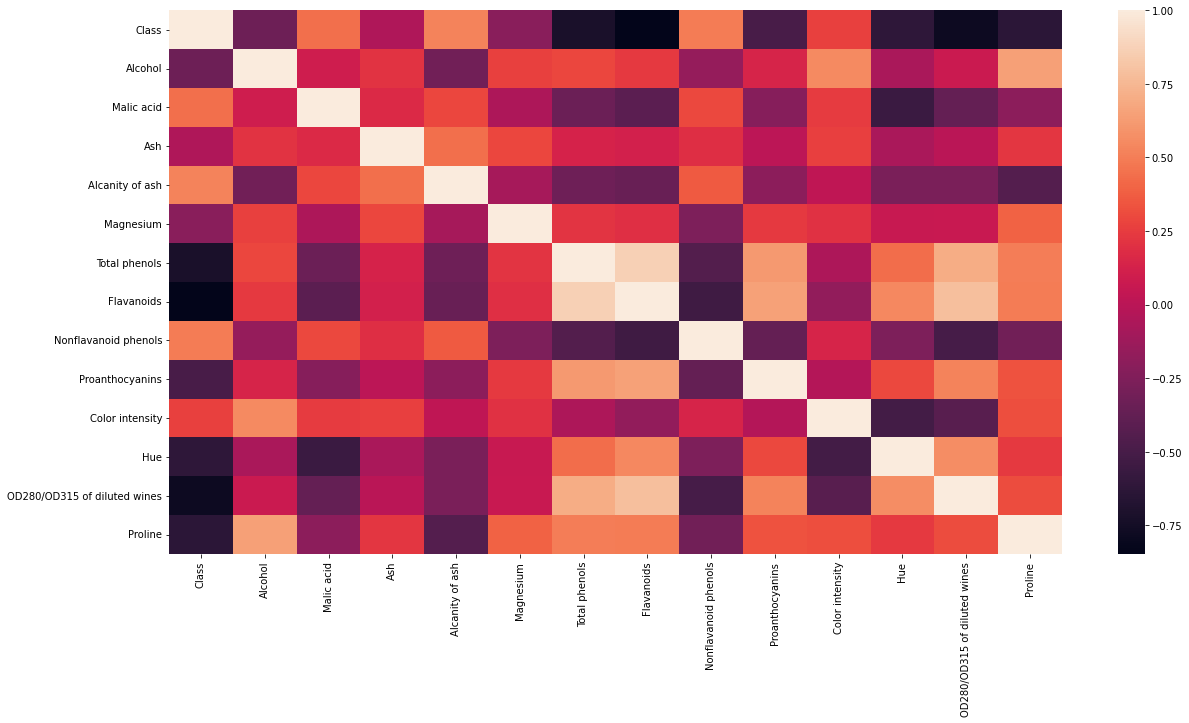

In [29]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(20,10))
sns.heatmap(data.corr())

<AxesSubplot:>

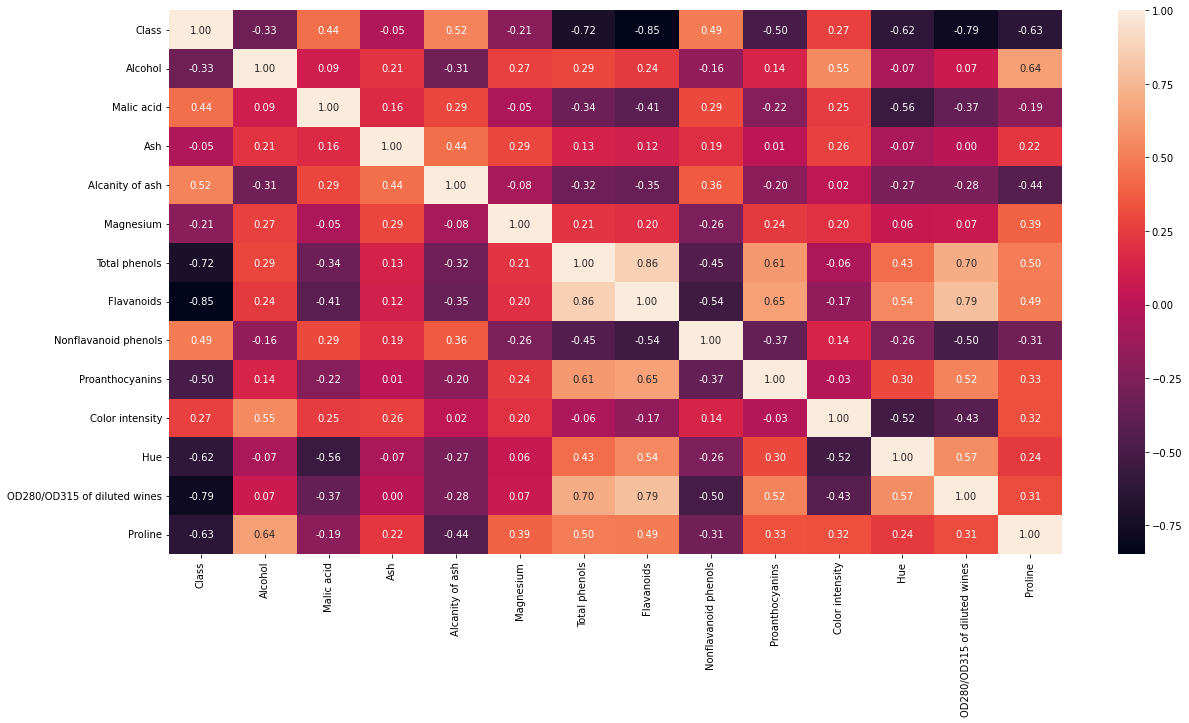

In [30]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(20,10))
sns.heatmap(data.corr(), annot=True, fmt='.2f')

<AxesSubplot:>

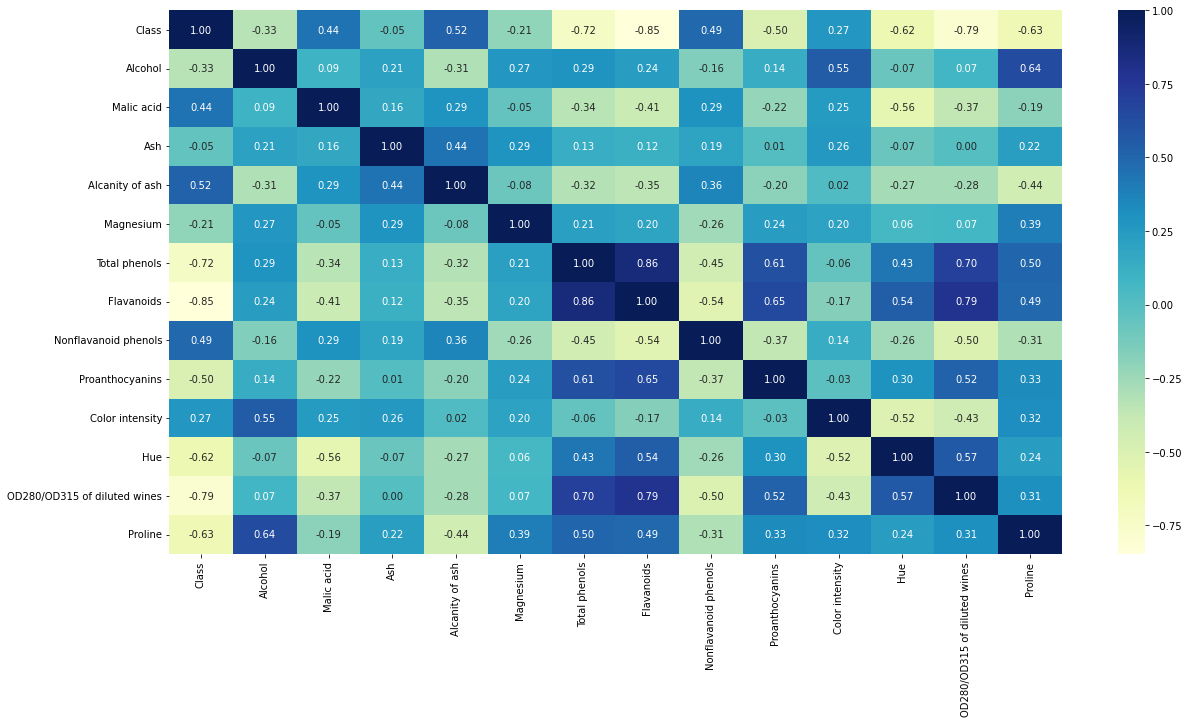

In [31]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(20,10))
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.2f')

/tmp/ipykernel_6231/2463320191.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(data.corr(), dtype=np.bool)


<AxesSubplot:>

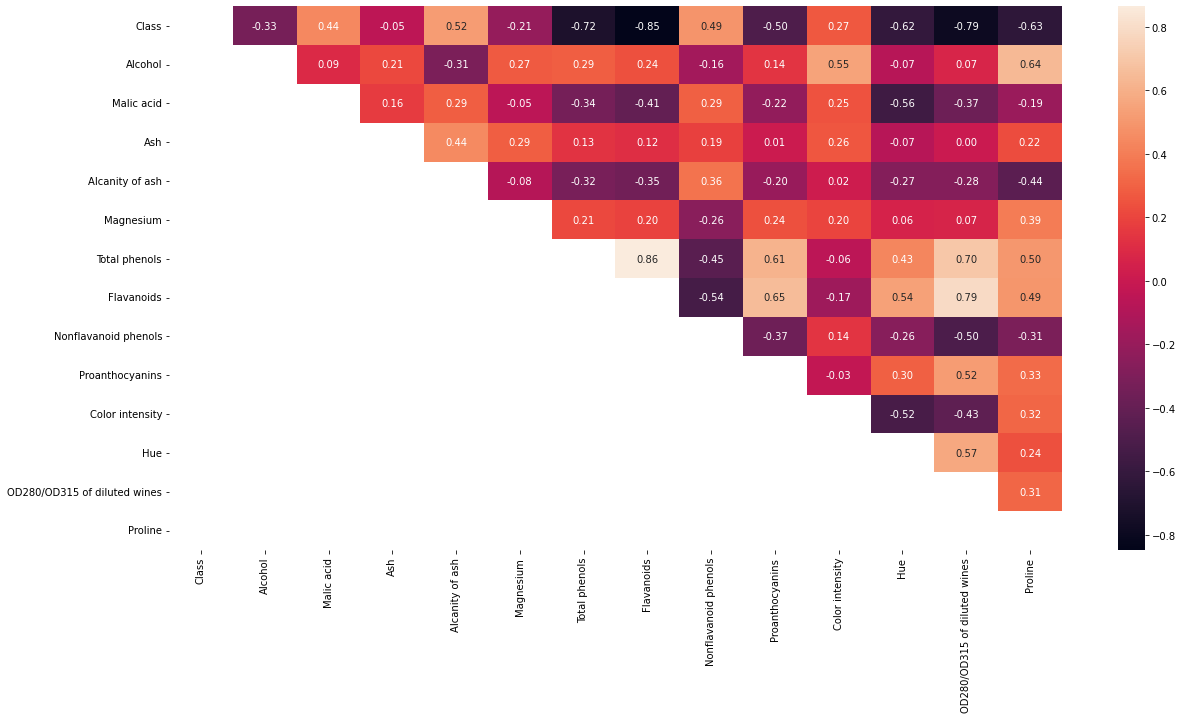

In [32]:
# Треугольный вариант матрицы
mask = np.zeros_like(data.corr(), dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(20,10))
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.2f')


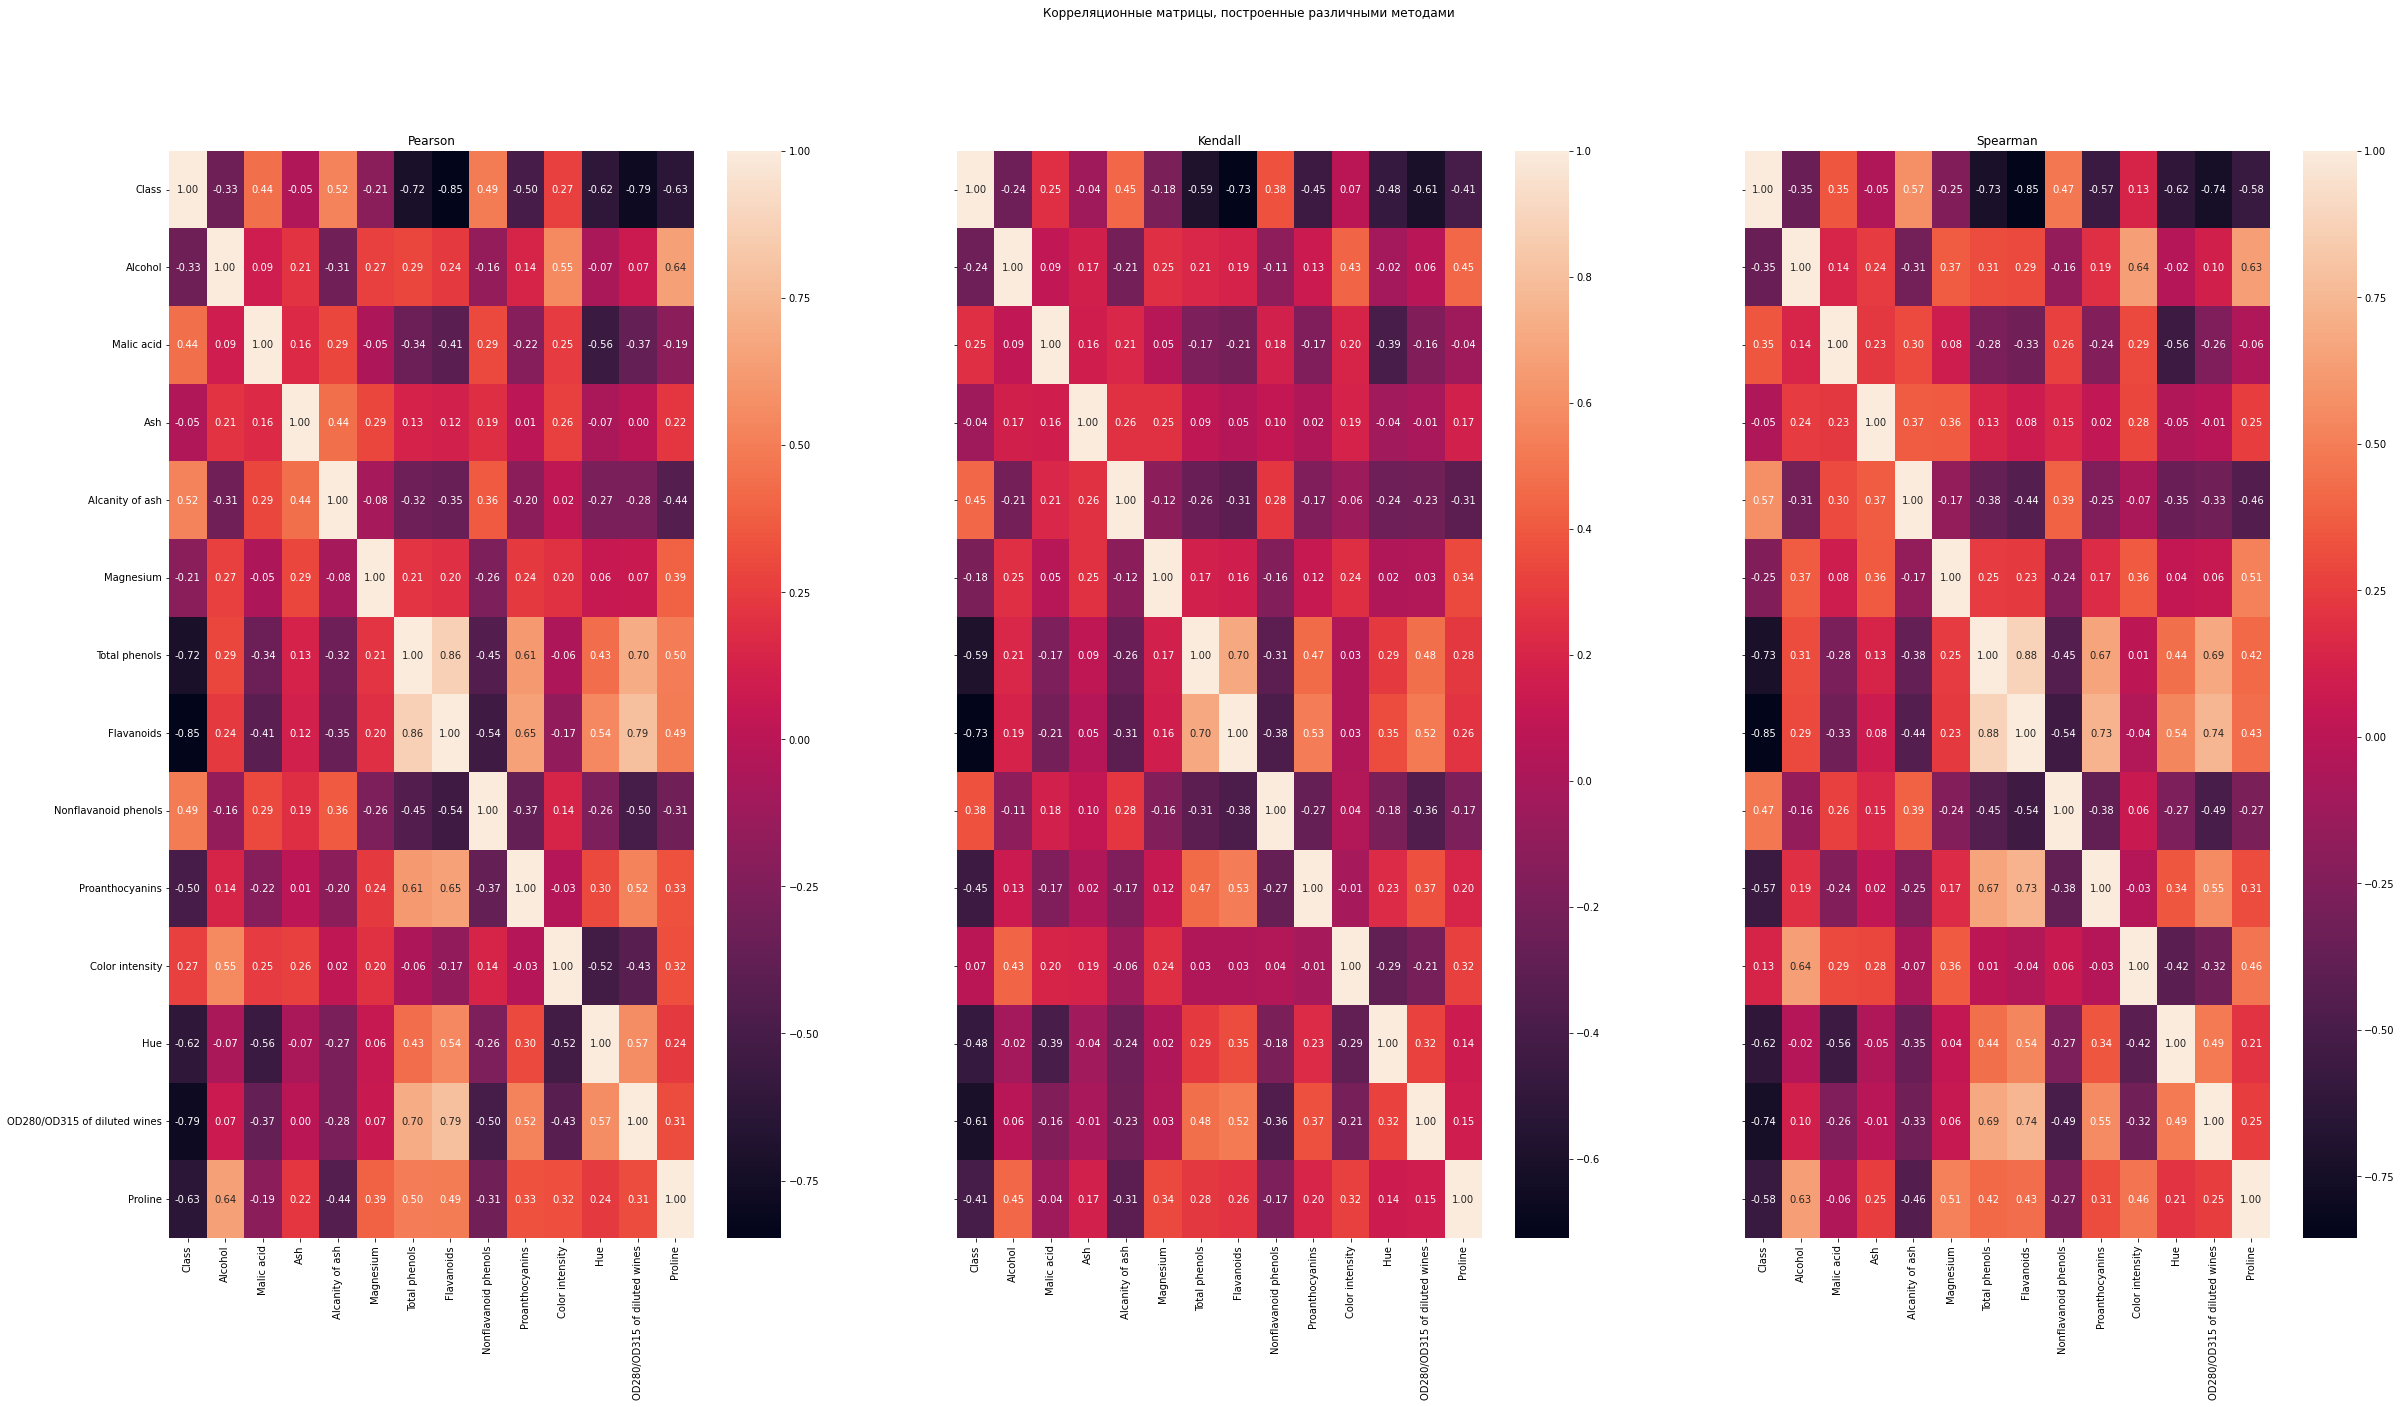

In [33]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(40,20))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

<AxesSubplot:>

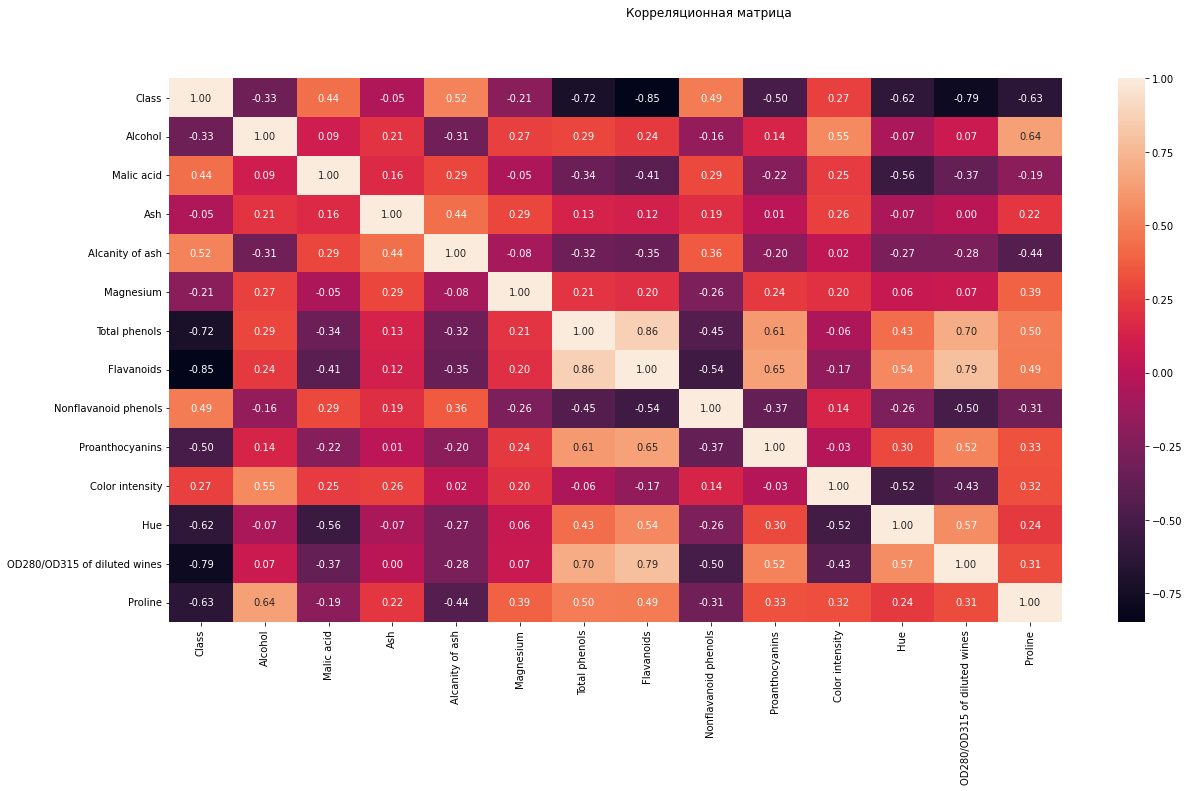

In [34]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(20,10))
fig.suptitle('Корреляционная матрица')
sns.heatmap(data.corr(), ax=ax, annot=True, fmt='.2f')